In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# ----------------------
# 1. Carregamento e Normalização
# ----------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar e adicionar canal
x_train = np.expand_dims(x_train.astype('float32') / 255.0, -1)
x_test = np.expand_dims(x_test.astype('float32') / 255.0, -1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# ----------------------
# 2. Separar Validação de x_train
# ----------------------
x_train_full, x_val, y_train_full, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

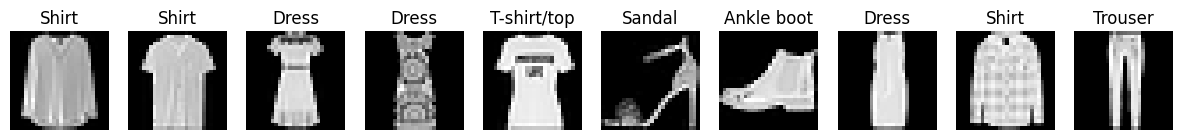

In [4]:
# ----------------------
# 3. Visualização de amostras
# ----------------------
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_samples(images, labels, n=10):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

plot_samples(x_train_full, y_train_full)

In [5]:
# ----------------------
# 4. Subconjunto pequeno para over/underfitting
# ----------------------
x_small, _, y_small, _ = train_test_split(
    x_train_full, y_train_full, train_size=2000, stratify=y_train_full, random_state=42
)

In [6]:
# ----------------------
# 5. Modelo Underfitting
# ----------------------
under_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(10, activation='softmax')
])

under_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_under = under_model.fit(
    x_small, y_small,
    epochs=20,
    validation_data=(x_val, y_val)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.0848 - loss: 2.4036 - val_accuracy: 0.0849 - val_loss: 2.3961
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0899 - loss: 2.3855 - val_accuracy: 0.0906 - val_loss: 2.3718
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0830 - loss: 2.3600 - val_accuracy: 0.0953 - val_loss: 2.3491
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0890 - loss: 2.3336 - val_accuracy: 0.1018 - val_loss: 2.3277
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1051 - loss: 2.2964 - val_accuracy: 0.1074 - val_loss: 2.3076
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1142 - loss: 2.2969 - val_accuracy: 0.1140 - val_loss: 2.2887
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1075 - loss: 2.2618 - val_accuracy: 0.1227 - val_loss: 2.2707
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1205 - loss: 2.2623 - val_accuracy: 0.1308 - v

In [7]:
# ----------------------
# 6. Modelo Overfitting
# ----------------------
over_model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

over_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_over = over_model.fit(
    x_small, y_small,
    epochs=30,
    validation_data=(x_val, y_val)
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.5913 - loss: 1.1627 - val_accuracy: 0.7832 - val_loss: 0.6185
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8277 - loss: 0.4471 - val_accuracy: 0.8173 - val_loss: 0.5493
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8910 - loss: 0.3063 - val_accuracy: 0.8325 - val_loss: 0.5079
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9398 - loss: 0.1794 - val_accuracy: 0.8226 - val_loss: 0.5995
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9564 - loss: 0.1291 - val_accuracy: 0.8211 - val_loss: 0.6114
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9739 - loss: 0.0827 - val_accuracy: 0.8284 - val_loss: 0.7112
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9744 - loss: 0.0631 - val_accuracy: 0.8387 - val_loss: 0.7394
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9932 - loss: 0.0231 - val_accuracy: 0.8328 - val_loss: 0.

In [8]:
# ----------------------
# 7. Augmentation para classes 0, 2, 4, 6
# ----------------------
idx_aug = np.isin(y_train_full, [0, 2, 4, 6])
x_aug = x_train_full[idx_aug]
y_aug = y_train_full[idx_aug]

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

x_augmented = []
y_augmented = []

for x_batch, y_batch in datagen.flow(x_aug, y_aug, batch_size=4000, shuffle=False):
    x_augmented.append(x_batch)
    y_augmented.append(y_batch)
    if len(x_augmented) * 4000 >= 16000:
        break

x_augmented = np.concatenate(x_augmented)
y_augmented = np.concatenate(y_augmented)

# Concatenar dados originais + aumentados
x_full_train = np.concatenate([x_train_full, x_augmented])
y_full_train = np.concatenate([y_train_full, y_augmented])

In [9]:
# ----------------------
# 8. Separar Validação (de novo) para Goodfitting
# ----------------------
x_train_final, x_val_final, y_train_final, y_val_final = train_test_split(
    x_full_train, y_full_train, test_size=0.1, stratify=y_full_train, random_state=42
)

In [10]:
# ----------------------
# 9. Modelo Goodfitting (Regularização L2 + Augmentation)
# ----------------------
reg_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  kernel_regularizer=regularizers.l2(1e-3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(1e-3)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-3)),
    layers.Dense(10, activation='softmax')
])

reg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_reg = reg_model.fit(
    x_train_final, y_train_final,
    validation_data=(x_val_final, y_val_final),
    epochs=30,
    batch_size=64
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6752 - loss: 1.0248 - val_accuracy: 0.7983 - val_loss: 0.6556
Epoch 2/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8088 - loss: 0.6300 - val_accuracy: 0.8209 - val_loss: 0.5809
Epoch 3/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8285 - loss: 0.5605 - val_accuracy: 0.8275 - val_loss: 0.5574
Epoch 4/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8374 - loss: 0.5284 - val_accuracy: 0.8417 - val_loss: 0.5357
Epoch 5/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8426 - loss: 0.5147 - val_accuracy: 0.8428 - val_loss: 0.5202
Epoch 6/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8523 - loss: 0.4917 - val_accuracy: 0.8431 - val_loss: 0.5200
Epoch 7/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8569 - loss: 0.4790 - val_accuracy: 0.8428 - val_loss: 0.5120
Epoch 8/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8629 - loss: 0.4654 - val_accuracy: 0.

In [11]:
# ----------------------
# 9. Modelo Goodfitting (Regularização L2 + Augmentation + Dropout=0.2)
# ----------------------
reg_model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  kernel_regularizer=regularizers.l2(1e-3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(1e-3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-3)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

reg_model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_reg_2 = reg_model_2.fit(
    x_train_final, y_train_final,
    validation_data=(x_val_final, y_val_final),
    epochs=30,
    batch_size=64
)

Epoch 1/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6315 - loss: 1.1584 - val_accuracy: 0.7895 - val_loss: 0.7081
Epoch 2/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7799 - loss: 0.7046 - val_accuracy: 0.8138 - val_loss: 0.6195
Epoch 3/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8020 - loss: 0.6347 - val_accuracy: 0.8255 - val_loss: 0.5742
Epoch 4/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8145 - loss: 0.6030 - val_accuracy: 0.8322 - val_loss: 0.5683
Epoch 5/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8222 - loss: 0.5814 - val_accuracy: 0.8380 - val_loss: 0.5440
Epoch 6/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8303 - loss: 0.5630 - val_accuracy: 0.8411 - val_loss: 0.5332
Epoch 7/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8351 - loss: 0.5518 - val_accuracy: 0.8444 - val_loss: 0.5365
Epoch 8/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8351 - loss: 0.5529 - val_accuracy: 0.

In [12]:
# ----------------------
# 9. Modelo Goodfitting (Regularização L1 + L2 + Augmentation)
# ----------------------
reg_model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  kernel_regularizer=regularizers.l1_l2(1e-3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l1_l2(1e-3)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(1e-3)),
    layers.Dense(10, activation='softmax')
])

reg_model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_reg_3 = reg_model_3.fit(
    x_train_final, y_train_final,
    validation_data=(x_val_final, y_val_final),
    epochs=30,
    batch_size=64
)

Epoch 1/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6005 - loss: 2.5360 - val_accuracy: 0.7337 - val_loss: 0.9733
Epoch 2/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7351 - loss: 0.9303 - val_accuracy: 0.7559 - val_loss: 0.8686
Epoch 3/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7472 - loss: 0.8606 - val_accuracy: 0.7683 - val_loss: 0.8183
Epoch 4/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7651 - loss: 0.8116 - val_accuracy: 0.7727 - val_loss: 0.7979
Epoch 5/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7695 - loss: 0.7840 - val_accuracy: 0.7583 - val_loss: 0.8049
Epoch 6/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7819 - loss: 0.7593 - val_accuracy: 0.7753 - val_loss: 0.7770
Epoch 7/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7777 - loss: 0.7469 - val_accuracy: 0.7870 - val_loss: 0.7420
Epoch 8/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7876 - loss: 0.7278 - val_accuracy: 0.

In [13]:
# ----------------------
# 10. Avaliação dos modelos
# ----------------------
def evaluate_model(model, x_test, y_test, title):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    print(f"\nClassification Report - {title}:\n")
    print(classification_report(y_test, y_pred, target_names=class_names))

evaluate_model(under_model, x_test, y_test, "Underfitting")
evaluate_model(over_model, x_test, y_test, "Overfitting")
evaluate_model(reg_model, x_test, y_test, "Goodfitting (L2)")
evaluate_model(reg_model_2, x_test, y_test, "Goodfitting (L2 + Dropout=0.2)")
evaluate_model(reg_model_3, x_test, y_test, "Goodfitting (L1 + L2)")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report - Underfitting:

              precision    recall  f1-score   support

 T-shirt/top       0.33      0.47      0.39      1000
     Trouser       0.06      0.03      0.04      1000
    Pullover       0.18      0.39      0.24      1000
       Dress       0.28      0.31      0.29      1000
        Coat       0.15      0.19      0.17      1000
      Sandal       0.33      0.03      0.06      1000
       Shirt       0.18      0.19      0.19      1000
     Sneaker       0.49      0.36      0.42      1000
         Bag       0.39      0.20      0.27      1000
  Ankle boot       0.50      0.57      0.53      1000

    accuracy                           0.27     10000
   macro avg       0.29      0.27      0.26     10000
weighted avg       0.29      0.27      0.26     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report - Overfitting:

              precision    recall  f1-score   support

 T-shirt/top       0.76  

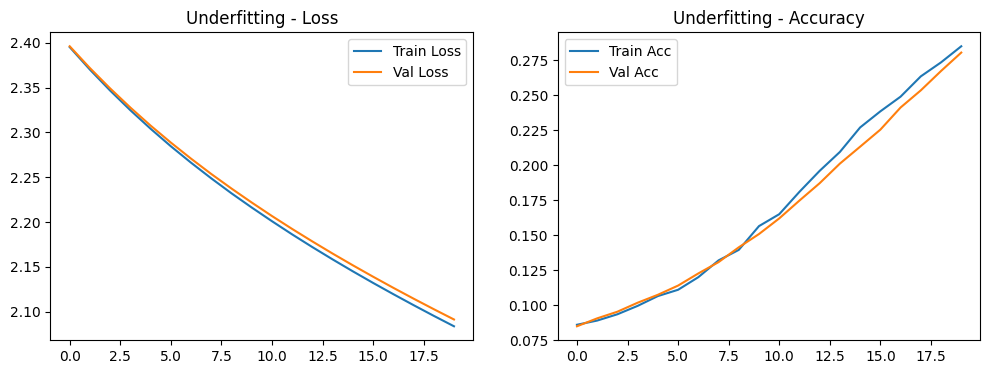

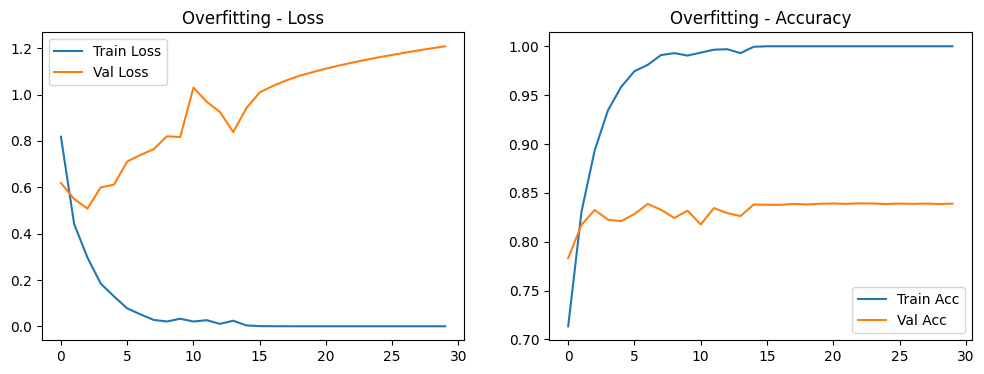

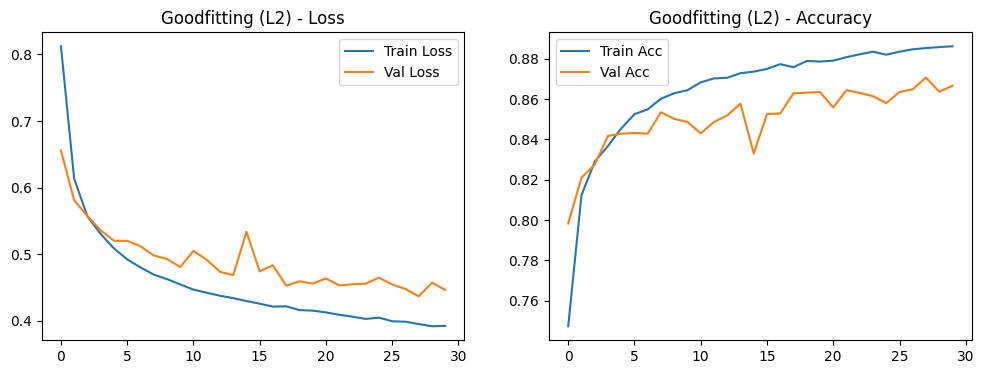

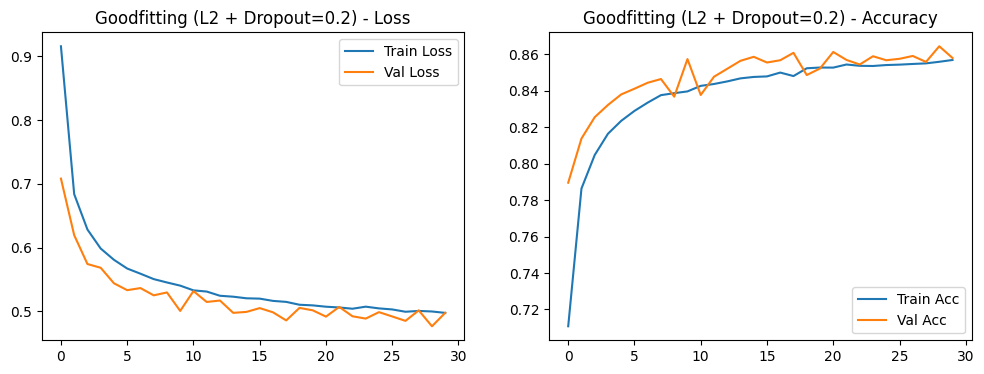

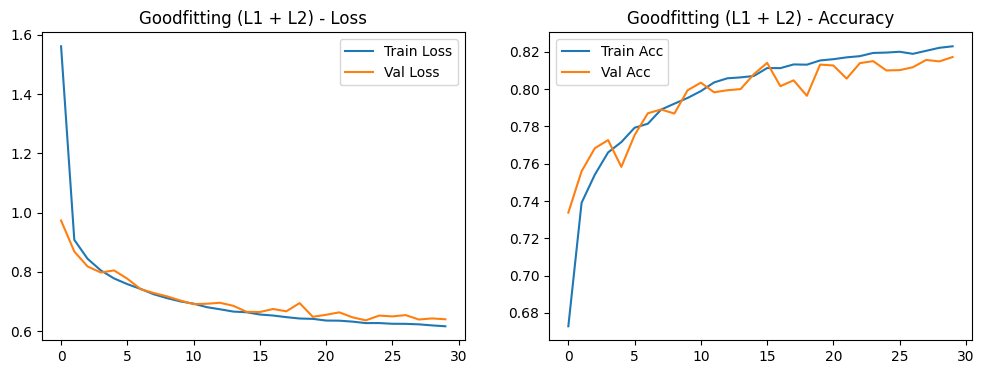

In [15]:
# ----------------------
# 11. Curvas de aprendizado
# ----------------------
def plot_history(hist, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['accuracy'], label='Train Acc')
    plt.plot(hist.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.show()

plot_history(history_under, "Underfitting")
plot_history(history_over, "Overfitting")
plot_history(history_reg, "Goodfitting (L2)")
plot_history(history_reg_2, "Goodfitting (L2 + Dropout=0.2)")
plot_history(history_reg_3, "Goodfitting (L1 + L2)")